### Name: Lindgren, Eric

### PSN: 970222-1954


# Problem 1

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Problem 2

In [2]:
# Generate noisy data with a quadratic feature
# use the following code:
np.random.seed(42)

# X are picked uniform random [0,2]
X = 2 * np.random.rand(100, 1)
# Linear relation to the predicted value, but with Gaussian noise (mean=0, variance=1)
y = 0.5 * X**2 + X + 2 + 0.2 * np.random.randn(100, 1)

### a) Perform a linear regression using the Normal Equation

The normal equation for linear regression, i.e. the function that calculates 
the vector $\vec{\theta}$ thet gives the $min(\epsilon)$, can be shown to be $\theta = (X^T X)^{-1}(X^T \cdot y)$. 

In [3]:
# First, create the design matrix. 
# The polynomial is quadratic, our model only 
# has three features: X^0, X^1, X^2
m = len(X)
X_d = np.concatenate((X**0, X**1, X**2), axis=1)

# Assuming that X_d is invertible, we can solve
# the normal equation as follows:
inv = np.linalg.inv
theta = inv(X_d.T.dot(X_d)).dot(X_d.T.dot(y))
display(f'theta  =  {theta}')
# Save theta for problem 6
theta_prob_2 = theta

'theta  =  [[2.11228054]\n [0.72777588]\n [0.61621274]]'

### b) Comparisons

y = 0.62X^2 + 0.73X + 2.11. This is compared to the "real" parameters:
y_real = 0.5X^2 + 1X + 2.

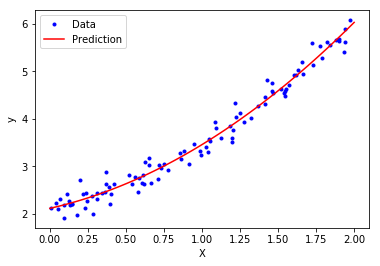

In [4]:
# Plot data and prediction
X_predict = np.linspace(0,2, m)
y_predict = theta[0] + theta[1]*X_predict + theta[2]*X_predict**2
fig, ax = plt.subplots(1,1)
ax.plot(X, y, 'b.', label="Data")
ax.plot(X_predict, y_predict, 'r-', label="Prediction")
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.legend(loc='best')

# Problem 3

### a) Perform linear regression with different models

In [5]:
# Load the data sets, and split it using the given command.
def load_data_from_file(file):
    datafile = f'DataFiles/{file}.dat'
    X, y = np.loadtxt(datafile, unpack=True)
    m = len(X)
    X = X.reshape(m,1); y = y.reshape(m,1)

    # built-in convenience function for splitting data
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.6, random_state=42)
    return {'X_train': X_train, 'X_val': X_val, 'y_train': y_train, 'y_val': y_val}

datafiles = ['dataset1', 'dataset2', 'dataset3']
datasets = {}

for file in datafiles:
    datasets[file] = load_data_from_file(file)

C:\Users\ericl\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [6]:
# Implement a function that calculates MSE
def calculate_MSE(y, y_predict):
    m = len(y)
    return 1/m * (y-y_predict).T.dot(y-y_predict)

In [7]:
# Perform linear regression using scikit learn with polynomials of orders
# 1,2,3,4,5 and 20.
fit_coefficients = {}
MSE_train = {}
MSE_val = {}
orders = [1,2,3,4,5,20]

# Fit data for each order for each of the three datasets
for dataset in datasets:
    data = datasets[dataset]
    MSE_train[dataset] = {}
    MSE_val[dataset] = {}
    fit_coefficients[dataset] = {}
    for order in orders:
        # Use scikit builtin to generate design matrix easily
        poly_features = PolynomialFeatures(degree=order, include_bias=False)
        # Notice that we don't include the bias term (X^0) in the design matrix. It
        # will be added below.
        X_d_train = poly_features.fit_transform(data["X_train"])
        # Fit the model to the data
        lin_reg = LinearRegression()
        lin_reg.fit(X_d_train, data["y_train"])
        y_predict_train = lin_reg.predict(X_d_train)
        # Save the coefficients - append to dict after formating intercept
        fit_coefficients[dataset][order] = np.concatenate([[lin_reg.intercept_], lin_reg.coef_], axis=1)
        # Calculate MSE - to do so generate a new design matrix to predict with
        X_d_val = poly_features.fit_transform(data["X_val"])
        y_predict_val = lin_reg.predict(X_d_val)
        # Add to MSE
        MSE_train[dataset][order] = calculate_MSE(data["y_train"], y_predict_train)
        MSE_val[dataset][order] = calculate_MSE(data["y_val"], y_predict_val)



In [8]:
# Print results for each dataset and each order
print('********* Fit Coefficients ***********')
display(fit_coefficients)
print('********* MSE train ***********')
display(MSE_train)
print('********* MSE val ***********')
display(MSE_val)

********* Fit Coefficients ***********


{'dataset1': {1: array([[ 8.64449594, -1.23456593]]),
  2: array([[ 0.12905012, -0.6366678 ,  2.58692409]]),
  3: array([[ 0.041779  ,  1.26978243,  2.52600994, -0.33172737]]),
  4: array([[ 1.99354331,  0.99062846,  0.50868938, -0.24964384,  0.24951078]]),
  5: array([[ 1.99321069e+00,  9.82284423e-01,  5.09920902e-01,
          -2.45236024e-01,  2.49294053e-01, -4.41040648e-04]]),
  20: array([[ 1.96142660e+00,  1.01584020e+00,  9.46056377e-01,
          -4.15026161e-01, -1.41630078e+00,  1.57342336e-01,
           2.70365408e+00, -2.45487039e-02, -2.21424450e+00,
          -2.91883234e-02,  1.02081754e+00,  1.71706825e-02,
          -2.81717825e-01, -4.14136941e-03,  4.75237088e-02,
           5.17837350e-04, -4.79981603e-03, -3.29457649e-05,
           2.66446269e-04,  8.42698841e-07, -6.24904496e-06]])},
 'dataset2': {1: array([[2.92526837, 0.39697212]]),
  2: array([[1.05194098, 0.52850475, 0.56910183]]),
  3: array([[ 0.98685097,  1.95040555,  0.52366981, -0.24741449]]),
  4: ar

********* MSE train ***********


{'dataset1': {1: array([[58.06150271]]),
  2: array([[4.41197488]]),
  3: array([[2.3258165]]),
  4: array([[0.00968507]]),
  5: array([[0.00967032]]),
  20: array([[0.0084082]])},
 'dataset2': {1: array([[3.99926325]]),
  2: array([[1.40282205]]),
  3: array([[0.24234933]]),
  4: array([[0.24212672]]),
  5: array([[0.24175792]]),
  20: array([[0.21020491]])},
 'dataset3': {1: array([[8.23664241]]),
  2: array([[4.96644011]]),
  3: array([[3.87758926]]),
  4: array([[3.87402756]]),
  5: array([[3.86812676]]),
  20: array([[3.36327856]])}}

********* MSE val ***********


{'dataset1': {1: array([[39.8789529]]),
  2: array([[4.11757722]]),
  3: array([[2.54406172]]),
  4: array([[0.00550791]]),
  5: array([[0.00561872]]),
  20: array([[0.00885626]])},
 'dataset2': {1: array([[3.1512768]]),
  2: array([[1.27826271]]),
  3: array([[0.13501289]]),
  4: array([[0.13769784]]),
  5: array([[0.14046792]]),
  20: array([[0.2214065]])},
 'dataset3': {1: array([[5.9775575]]),
  2: array([[3.88997846]]),
  3: array([[2.16020617]]),
  4: array([[2.20316537]]),
  5: array([[2.24748671]]),
  20: array([[3.54250393]])}}

Questions to ponder: 
1: Across all three datasets, MSE val is generally the lowest for the fourth
or the fifth order polynomial (fourth is somewhat lower). Since the MSE is calculated against the validation data, this indicates that a fourth (maybe fifth) order polynomial was used to generate the original data. It's the best performing model at the very least.

2: I'd say that that would be dataset three, since the MSE val is generally larger for all orders model orders than for the other datasets. For orders 4-20, it's atleast an order of magnitude larger. Since the higher order models generally will overfit to the training data to a higher degree than lower order models, this higher MSE indicates that there is a larger discrepancy between the validation and training data in dataset three. This in turn could be due to a larger amount of random noise on the generated data, leading to a larger spread in the data. 

Another thing that would indicate this is that there are no verification questions regarding the fit on dataset three on OpenTA. This could possibly be due to the variances in the fit parameters being too large. ;)

# Problem 4


# Problem 5

In [9]:
datafile = 'DataFiles/dataset3.dat'
X, y = np.loadtxt(datafile, unpack=True)
m = len(X)
X = X.reshape(m,1); y = y.reshape(m,1)

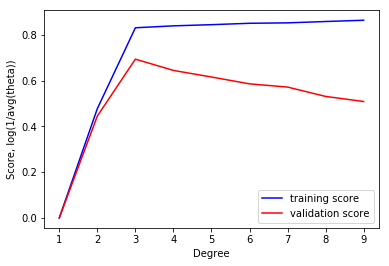

In [10]:
degrees = [i for i in range(1,10)]

# Implement MSE from before as error function

# Define figure to plot in 
fig, ax = plt.subplots(1,1)

k = 5;  # K-fold cross validation - number of folds
train_scores = np.zeros((len(degrees),1))
val_scores = np.zeros((len(degrees),1))

for i in range(len(degrees)):
    degree = degrees[i]
    # Split data into k batches - (k-fold cross validation)
    X_k = [X[i*int(m/k):(i+1)*int(m/k)] for i in range(k)]  # Split into k parts
    y_k = [y[i*int(m/k):(i+1)*int(m/k)] for i in range(k)]
    #X_k = X_k.reshape(len(X_k),1); y_k = y_k.reshape(len(y_k),1)
    MSE_trains = np.zeros((k,1))
    MSE_vals = np.zeros((k,1))
    for idx in range(len(X_k)):
        x_val = X_k[idx]
        y_val = y_k[idx]
        x_train = np.concatenate([X_k[:idx], X_k[idx+1:]], axis=None)  # Get all other than training set
        y_train = np.concatenate([y_k[:idx], y_k[idx+1:]], axis=None)
        x_train = x_train.reshape(len(x_train),1); y_train = y_train.reshape(len(y_train),1)
        # Reshape x_train and x_val for fit_transform
        # Define the design matrix
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        X_d_train = poly_features.fit_transform(x_train)
        # Fit the model to the data
        lin_reg = LinearRegression()
        lin_reg.fit(X_d_train, y_train)
        # Perform the calculation of MSE for training and validation sets
        # Calculate MSE - to do so generate a new design matrix to predict with
        # Training score
        y_predict_train = lin_reg.predict(X_d_train)
        MSE_train = calculate_MSE(y_train, y_predict_train)
        # Validation score
        X_d_val = poly_features.fit_transform(x_val)  # Create a new design matrix for validation
        y_predict_val = lin_reg.predict(X_d_val)
        MSE_val = calculate_MSE(y_val, y_predict_val)
        # Append scores
        MSE_trains[idx] = MSE_train
        MSE_vals[idx] = MSE_val
    # Calculate the means of trains and vals
    train_scores[i] = np.average(MSE_trains)
    val_scores[i] = np.average(MSE_vals)

# Norm train_scores, and calculate the score. My score is defined as
# log(1/norm(average(MSE))).
train_scores = train_scores/(np.amax(train_scores))
val_scores = val_scores/(np.amax(val_scores))


# Plot                   
ax.plot(degrees, np.log(1/train_scores), 'b', label='training score')
ax.plot(degrees, np.log(1/val_scores), 'r', label='validation score')
ax.set_xlabel('Degree')
ax.set_ylabel('Score, log(1/avg(theta))')
ax.legend(loc='best');


From the validation curves above it seems as though the validation score is the highest (error the lowest) for a 3rd degree polynomial. For higher degrees the validation decreases, indicating that the model is overfitting to the data. This is further indicated by the training score, which hits a plateu and stops increasing as much for higher degree polynomials than 3. 

This conclusion is not entirely in line with problem 3, where I maintained that the polynomial was of order 4 or 5. It's interesting that I got a different answer in this problem, but it could be due to the fact that I've used k-fold cross validation here. That gives me a more stable answer for the losses and thus the score, than the single training split as was used in problem 3. It's possible that the split in problem 3 is more reminiscant of a 4th or 5th degree polynomial than what is actually the case. Or I've simply made a mistake somewhere. :)

# Problem 6

In [11]:
# Generate noisy data with a quadratic feature
# use the following code:
np.random.seed(42)

# X are picked uniform random [0,2]
X = 2 * np.random.rand(100, 1)
# Linear relation to the predicted value, but with Gaussian noise (mean=0, variance=1)
y = 0.5 * X**2 + X + 2 + 0.2 * np.random.randn(100, 1)

## a) Batch and stochastic gradient descent

### Batch gradient descent

In [12]:
# learning hyperparameter 
eta = 0.15
# number of iterations
n_iterations = 1000
m = len(X)


X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)

X_d = np.concatenate((X**0, X**1, X**2), axis=1)

 Use $\nabla \theta = \frac{2}{len(X)} X^T \cdot (X \theta - y)$

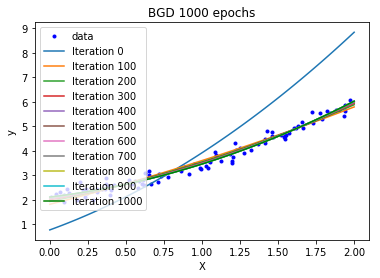

In [13]:
# Initial guess for parameter vector
theta = np.random.randn(3,1)  # 3 features in our data above

# Save thetas for c)
theta_path_bgd = []

fig, ax = plt.subplots(1,1)  # Plot convergence for tuning purposes
ax.plot(X,y, 'b.', label='data')
X_m = np.linspace(0,2,100)
for iteration in range(n_iterations):
    gradients = 2/m * X_d.T.dot(X_d.dot(theta)-y)
    theta  = theta - eta*gradients
    # plot current model every 100 iterations
    if(iteration%(n_iterations/10)==0 or iteration==0):
        y_model = theta[2]*X_m**2 + theta[1]*X_m + theta[0]
        ax.plot(X_m, y_model, label=f'Iteration {iteration}')
    # TODO save thetas for c)
    theta_path_bgd.append(theta)
# plot final result 
y_model = theta[2]*X_m**2 + theta[1]*X_m + theta[0]
ax.plot(X_m, y_model, 'g-', label=f'Iteration {iteration+1}')

ax.legend(loc='best');
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title(f"BGD {n_iterations} epochs");

The best learning parameter for BGD was found to be $\eta \approx 1.5$.

In [14]:
theta_BGD = theta
with np.printoptions(precision=4):
    display(f'Best theta BGD: {theta_BGD}')

'Best theta BGD: [[2.1082]\n [0.7394]\n [0.6106]]'

This can be compared to the data parameters, which were $\theta_0 = 2$, $\theta_1 = 1$ and $\theta_2 = 0.5$.

### Stochastic gradient descent

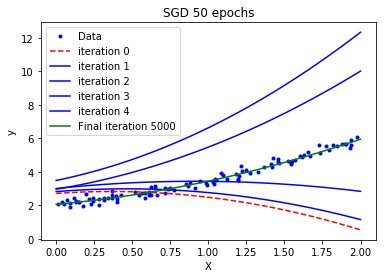

In [15]:
m = len(X)
# For each epoch, go through all data.
n_epochs = 50
# Define learning paramaters as in the example
t0, t1 = 5, 50

theta_path_sgd = []

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(3,1)  # Initialize theta

fig, ax = plt.subplots(1,1)
ax.plot(X, y, 'b.', label='Data')  # Plot the data

X_p = np.linspace(0,2,m) ## Predict design matrix
X_p = X_p.reshape((m,1))
X_p_d = np.concatenate((X_p**0, X_p**1, X_p**2), axis=1)
for epoch in range (n_epochs):
    for i in range(m):
        if epoch == 0 and i < 5:
            # Plot the first five iterations
            y_predict = X_p_d.dot(theta)
            style = "b-" if i > 0 else "r--"
            ax.plot(X_p, y_predict, style, label=f'iteration {epoch*m + i}')
        # Go to a random instance of the data
        random_index = np.random.randint(m)
        xi = X_d[random_index: random_index+1]
        yi = y[random_index:random_index+1]
        # The differece is SGD is that the gradient is calculated in a random point
        # instead of over all instances at once as in BGD. Thus, we take a lot
        # of "smaller" steps than in BGD.
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)  
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients
        # TODO save thetas for c)
        theta_path_sgd.append(theta)
        
# Plot the final solution
y_predict = X_p_d.dot(theta)
style = "g-"
ax.plot(X_p, y_predict, style, label=f'Final iteration {epoch*m + (i+1)}')
ax.legend(loc='best');
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title(f"SGD {n_epochs} epochs");

In [16]:
theta_SGD = theta
with np.printoptions(precision=4):
    display(f'Best theta SGD: {theta_SGD}')

'Best theta SGD: [[2.0686]\n [0.8301]\n [0.556 ]]'

This can be compared to the data parameters, which were $\theta_0 = 2$, $\theta_1 = 1$ and $\theta_2 = 0.5$.

So all my solutions, including the one from problem 2, are:

In [17]:
with np.printoptions(precision=4):
    display(f'theta problem 2: {theta_prob_2}')
    display(f'Best theta BGD: {theta_BGD}')
    display(f'Best theta SGD: {theta_SGD}')

'theta problem 2: [[2.1123]\n [0.7278]\n [0.6162]]'

'Best theta BGD: [[2.1082]\n [0.7394]\n [0.6106]]'

'Best theta SGD: [[2.0686]\n [0.8301]\n [0.556 ]]'

The solutions are all very similar, however SGD seems to come the closest to the actual data parameters, whereas BGD comes closer to the exact solution from problem 2. Note that the difference isn't very large, and that the computational resources required increases for the more advanced models. The normal equation used in problem 2 consists of a single line matrix calculation, with only four matrices and gives the exact solution to the problem. BGD does one matrix calculation for each iteration, and there are 1000 iterations in total. SGD does one matrix calculation, however with a very small matrix, for each iteration with 5000 iterations in total. It would be interesting to analyze the computational difference between the models in more detail.

## b) Mini-batch gradient descent

[[2.14582805]
 [0.59205496]
 [0.69017252]]


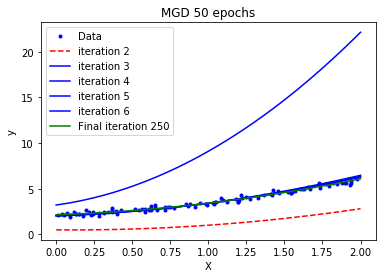

In [41]:
np.random.seed(42)  # Force seed here so that subsequent runs are the same
# Same as SGD, but with slight modifications
m = len(X)
# For each epoch, go through all data.
n_epochs = 50
batch_size = 0.2  # Batch size in %
# Define learning paramaters as in the example
t0, t1 = 20,80

theta_path_mgd= []
def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(3,1)  # Initialize theta

fig, ax = plt.subplots(1,1)
ax.plot(X, y, 'b.', label='Data')  # Plot the data

## Create predict design matrix
X_p = np.linspace(0,2,m) 
X_p = X_p.reshape((m,1))
X_p_d = np.concatenate((X_p**0, X_p**1, X_p**2), axis=1)

for epoch in range(n_epochs):
    # Set random seed. This is necessary to permute x and y in the same way
    np.random.seed(epoch)
    # Permute data and split into batches. This makes "sure" that the 
    # mini-batches are different between epochs.
    X_perm = np.random.permutation(X)
    # Reset the random number generator
    np.random.seed(epoch)
    y_perm = np.random.permutation(y)
    # Split into groups of size batch_size*m
    X_batches = [X[int(i*m*batch_size):int((i+1)*m*batch_size)] for i in range(int(m/(batch_size*100)))]
    y_batches = [y[int(i*m*batch_size):int((i+1)*m*batch_size)] for i in range(int(m/(batch_size*100)))]
    for idx in range(len(X_batches)):
        if idx == 0 and epoch < 5:
            # Plot the first five iterations in epoch one
            y_predict = X_p_d.dot(theta)
            style = "b-" if epoch > 0 else "r--"
            ax.plot(X_p, y_predict, style, label=f'iteration {(epoch+1) +(idx+1)}')
        x_b = X_batches[idx]
        y_b = y_batches[idx] 
        # Create design matrix
        X_b_d = np.concatenate((x_b**0, x_b**1, x_b**2), axis=1)
        # Calculate the gradient and apply to theta
        n = len(x_b)
        gradient = 2/n * X_b_d.T.dot(X_b_d.dot(theta)-y_b)
        eta = learning_schedule(epoch*m + idx)
        theta = theta - eta*gradient
        # TODO save for plot in c)
        theta_path_mgd.append(theta)

# Plot the final solution
y_predict = X_p_d.dot(theta)
style = "g-"
ax.plot(X_p, y_predict, style, label=f'Final iteration {(epoch+1)*(idx+1)}')
ax.legend(loc='best');
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title(f"MGD {n_epochs} epochs");
theta_MGD = theta
print(theta_MGD)

In [43]:
with np.printoptions(precision=4):
    display(f'theta problem 2: {theta_prob_2}')
    display(f'Best theta BGD: {theta_BGD}')
    display(f'Best theta SGD: {theta_SGD}')
    display(f'Best theta MGD: {theta_MGD}')

'theta problem 2: [[2.1123]\n [0.7278]\n [0.6162]]'

'Best theta BGD: [[2.1082]\n [0.7394]\n [0.6106]]'

'Best theta SGD: [[2.0686]\n [0.8301]\n [0.556 ]]'

'Best theta MGD: [[2.1458]\n [0.5921]\n [0.6902]]'

The solution using MGD gets fairly close to the exact solution from problem 2, and it does so in much fewer iterations than BGD and SGD. It's hard to tell which of the methods performs the best without a more in-depth analysis, but MGD seems to be one of the best. 

## c) Convergence

Plot only $\theta_1$ and $\theta_2$ since they control the shape of the curve. $\theta_0$ is only a bias term to the curve. 

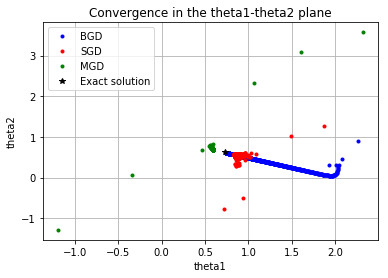

In [70]:
fig, ax = plt.subplots(1,1)

# reshape data for plot
# BGD
bgd = np.array(theta_path_bgd)
bgd = bgd.reshape((len(bgd),3))
# SGD
sgd = np.array(theta_path_sgd)
sgd = sgd.reshape((len(sgd),3))
# MGD
mgd = np.array(theta_path_mgd)
mgd = mgd.reshape((len(mgd),3))

ax.plot(bgd[:, 1], bgd[:, 2], 'b.', label='BGD')
ax.plot(sgd[:, 1], sgd[:, 2], 'r.', label='SGD')
ax.plot(mgd[:, 1], mgd[:, 2], 'g.', label='MGD')
# Plot solution from problem 2
ax.plot(theta_prob_2[1], theta_prob_2[2], 'k*', label='Exact solution')
ax.legend(loc='best');
ax.set_xlabel('theta1')
ax.set_ylabel('theta2')
ax.set_title(f"Convergence in the theta1-theta2 plane");
plt.grid(True)


Here we see that BGD comes closest to the exact solution (in the $\theta_1-\theta_2$ plane), with SGD and MGD some distance away. Note though that it takes BGD far longer to converge, whilst SGD and MGD converges very rapidly. This gives us some indication on the computational efficiency of the techniques. BGD seems to be very stable but computationally intensive and SGD is a bit more erratic in it's convergence. MGD strikes the middle ground in between the two, with a somewhat slower but much more stable convergence than SGD. 

Thus one can conclude that it is unecessaryto calculate the gradients from the full batches, but a bit too unstable to do it from stochastically chosen instances of the data. The sweetspot seems to be to consider some fairly large fraction of the data for each batch. 